<a href="https://colab.research.google.com/github/eshwarprithvi/Deep-Learning/blob/master/Multivariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import random 
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [0]:
(x_train, y_train), (x_test, y_test)=tf.compat.v2.keras.datasets.boston_housing.load_data(path='boston_housing.npz',test_split=0.2,seed=113)

x_train = preprocessing.scale(x_train)
y_train = preprocessing.scale(y_train)
n=np.shape(x_train)[1]
m=np.shape(x_train)[0]
y_train=np.reshape(y_train,(m,1))
y_test=np.reshape(y_test,(np.shape(y_test)[0],1))

In [0]:
theta=np.random.random((n,1))
theta=np.zeros((n,1))

In [0]:
print(np.shape(theta))
print(np.shape(x_train))

(13, 1)
(404, 13)


In [0]:
cost_list=[]
alpha=0.01
its=500
for i in range(its):
    hypothesis=np.matmul(x_train,theta)
    diff=np.subtract(hypothesis,y_train)
    cost=np.matmul(np.transpose(diff),diff)
    cost=cost[0][0]/(2*m)
    grad=np.matmul(np.transpose(x_train),diff)
    grad=grad/m
    theta=np.subtract(theta,alpha*grad)
    cost_list.append(cost)

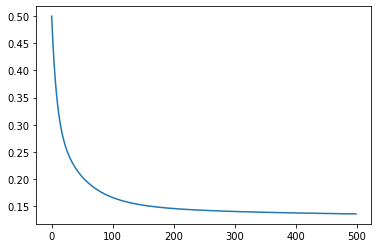

In [0]:
plt.plot(range(0,its),cost_list)
plt.show()

In [0]:
hypothesis=np.matmul(x_train,theta)
diff=np.subtract(hypothesis,y_train)
cost=np.matmul(np.transpose(diff),diff)
cost=cost[0][0]/(2*m)

print("Train Cost=",cost)

hypothesis=np.matmul(x_test,theta)
diff=np.subtract(hypothesis,y_test)
cost=np.matmul(np.transpose(diff),diff)
cost=cost[0][0]/(2*m)

print("Test Cost=",cost)

Train Cost= 0.13559821220495763
Test Cost= 26.358955196877325
